In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL

import tensorflow as tf
import keras 
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 32
image_height = 224
image_width = 200

In [3]:
train_data = keras.preprocessing.image_dataset_from_directory(
    '/home/mikey/Downloads/flowers/train',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = ['sunflower', 'rose'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = 'training'
)

Found 1268 files belonging to 2 classes.
Using 1142 files for training.


In [4]:
valid_data = keras.preprocessing.image_dataset_from_directory(
    '/home/mikey/Downloads/flowers/train',
    labels = 'inferred',
    label_mode = 'binary',
    class_names = ['sunflower', 'rose'],
    color_mode = 'rgb',
    batch_size = batch_size,
    image_size = (image_height, image_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.1,
    subset = 'validation'
)

Found 1268 files belonging to 2 classes.
Using 126 files for validation.


In [5]:
train_data.class_names

['sunflower', 'rose']

In [6]:
data, labels = next(iter(train_data))

In [7]:
images = data.shape[1:]

In [8]:
images.shape

AttributeError: 'TensorShape' object has no attribute 'shape'

In [9]:
images_and_labels = zip(images, labels)

TypeError: Invalid shape () for image data

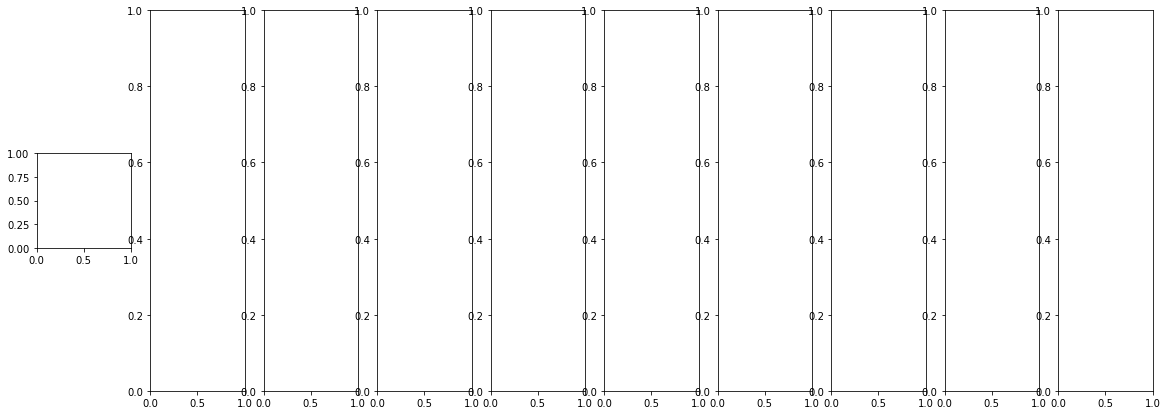

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize = (20,7))

for ax, image in zip(ax, images):
    ax.imshow(image)
    ax.set_axis_off()
#     ax.set_title(label)
plt.tight_layout()
plt.show()

In [ ]:
image.shape

TypeError: Invalid shape () for image data

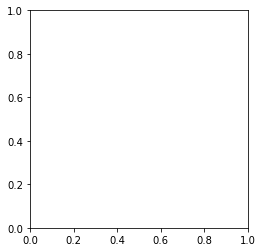

In [11]:
plt.imshow(image)

In [12]:
dir(PIL.Image)

['ADAPTIVE',
 'AFFINE',
 'ANTIALIAS',
 'BICUBIC',
 'BILINEAR',
 'BOX',
 'CUBIC',
 'Callable',
 'DECODERS',
 'DEFAULT_STRATEGY',
 'DecompressionBombError',
 'DecompressionBombWarning',
 'ENCODERS',
 'EXTENSION',
 'EXTENT',
 'Exif',
 'FASTOCTREE',
 'FILTERED',
 'FIXED',
 'FLIP_LEFT_RIGHT',
 'FLIP_TOP_BOTTOM',
 'FLOYDSTEINBERG',
 'HAMMING',
 'HUFFMAN_ONLY',
 'ID',
 'Image',
 'ImageMode',
 'ImagePointHandler',
 'ImageTransformHandler',
 'LANCZOS',
 'LIBIMAGEQUANT',
 'LINEAR',
 'MAXCOVERAGE',
 'MAX_IMAGE_PIXELS',
 'MEDIANCUT',
 'MESH',
 'MIME',
 'MODES',
 'MutableMapping',
 'NEAREST',
 'NONE',
 'OPEN',
 'ORDERED',
 'PERSPECTIVE',
 'Path',
 'QUAD',
 'RASTERIZE',
 'RLE',
 'ROTATE_180',
 'ROTATE_270',
 'ROTATE_90',
 'SAVE',
 'SAVE_ALL',
 'TRANSPOSE',
 'TRANSVERSE',
 'TiffTags',
 'USE_CFFI_ACCESS',
 'UnidentifiedImageError',
 'WEB',
 '_E',
 '_ENDIAN',
 '_MAPMODES',
 '_MODE_CONV',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',

In [13]:
train_data, valid_data

(<BatchDataset shapes: ((None, 224, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 224, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>)

In [14]:
model = Sequential([
    Conv2D(64, 3, activation = 'relu', input_shape = (224,200,3)),
    MaxPooling2D(2,2),
    Conv2D(128, 3, activation = 'relu'),
    Flatten(),
    Dense(2)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 99, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 97, 128)      73856     
_________________________________________________________________
flatten (Flatten)            (None, 1353344)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2706690   
Total params: 2,782,338
Trainable params: 2,782,338
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = keras.optimizers.Adam(learning_rate = 0.01))

In [18]:
train_data.prefetch(tf.data.AUTOTUNE).cache()

<CacheDataset shapes: ((None, 224, 200, 3), (None, 1)), types: (tf.float32, tf.float32)>

In [19]:
model.fit(x = train_data, epochs = 10, verbose = 2, batch_size = 32)

Epoch 1/10
36/36 - 343s - loss: 7.6949
Epoch 2/10
36/36 - 261s - loss: 7.6611
Epoch 3/10
36/36 - 278s - loss: 7.6611
Epoch 4/10
36/36 - 256s - loss: 7.6611
Epoch 5/10
36/36 - 256s - loss: 7.6611
Epoch 6/10
36/36 - 269s - loss: 7.6611
Epoch 7/10
36/36 - 243s - loss: 7.6611
Epoch 8/10
36/36 - 242s - loss: 7.6611
Epoch 9/10
36/36 - 242s - loss: 7.6611
Epoch 10/10
36/36 - 238s - loss: 7.6611
